In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [64]:
df_test = pd.read_csv('./datasets/test.csv')
df_train = pd.read_csv('./datasets/train.csv')

In [65]:
df_train=df_train.dropna(subset=['Total Bsmt SF','Garage Cars','Garage Area'])

In [66]:
df_train.shape

(2049, 81)

In [67]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [68]:
y=df_train['SalePrice']

In [69]:
X=df_train[['Overall Qual','Gr Liv Area','Garage Area']]

(-200, 6000)

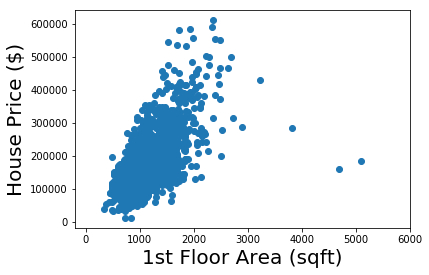

In [137]:
plt.scatter(df_train['1st Flr SF'],y)
plt.xlabel('1st Floor Area (sqft)',size=20,fontdict=None)
plt.ylabel('House Price ($)',size=20,fontdict=None)
plt.xlim(-200,6000)

(-200, 6000)

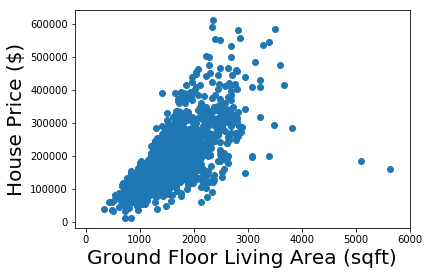

In [138]:
plt.scatter(df_train['Gr Liv Area'],y)
plt.xlabel('Ground Floor Living Area (sqft)',size=20,fontdict=None)
plt.ylabel('House Price ($)',size=20,fontdict=None)
plt.xlim(-200,6000)

(-200, 6000)

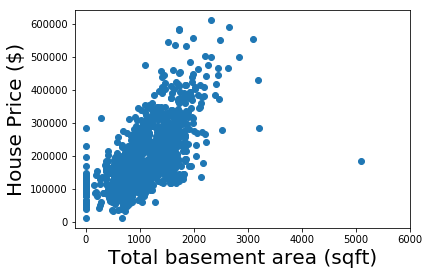

In [139]:
plt.scatter(df_train['Total Bsmt SF'],y)
plt.xlabel('Total basement area (sqft)',size=20,fontdict=None)
plt.ylabel('House Price ($)',size=20,fontdict=None)
plt.xlim(-200,6000)

(-200, 6000)

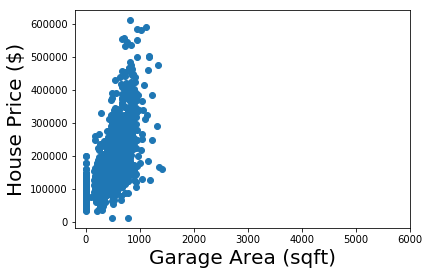

In [136]:
plt.scatter(df_train['Garage Area'],y)
plt.xlabel('Garage Area (sqft)',size=20,fontdict=None)
plt.ylabel('House Price ($)',size=20,fontdict=None)
plt.xlim(-200,6000)

# Ground Living area * Garage Area


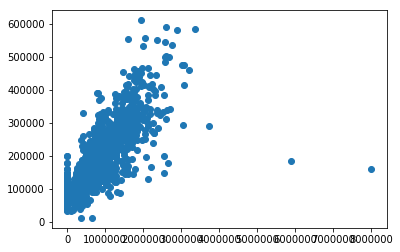

In [74]:
plt.scatter([df_train['Gr Liv Area']*df_train['Garage Area']],y)


# Ground living area * Total basement area

Text(0, 0.5, 'House Price ($)')

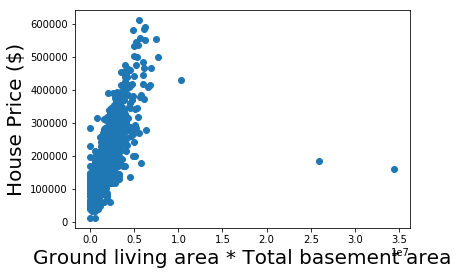

In [133]:
plt.scatter([df_train['Gr Liv Area']*df_train['Total Bsmt SF']],y)
plt.xlabel('Ground living area * Total basement area',size=20,fontdict=None)
plt.ylabel('House Price ($)',size=20,fontdict=None)

In [76]:
df_train.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175536,0.026354,-0.024444,0.032901,-0.061306,-0.026189,-0.063862,-0.090562,-0.035295,...,-0.009380,0.001643,0.032409,-0.022758,0.009866,0.055730,-0.012653,0.128269,-0.975764,-0.051360
PID,0.175536,1.000000,-0.003365,-0.091661,0.024526,-0.265056,0.106123,-0.346259,-0.176452,-0.247553,...,-0.041210,-0.080478,0.149200,-0.024589,-0.041765,0.005891,0.004315,-0.031774,0.008698,-0.254465
MS SubClass,0.026354,-0.003365,1.000000,-0.389368,-0.245794,0.035285,-0.069696,0.035899,0.044089,-0.004208,...,0.001222,-0.020494,-0.040578,-0.030122,-0.038908,-0.004604,-0.027516,0.012869,-0.032720,-0.087881
Lot Frontage,-0.024444,-0.091661,-0.389368,1.000000,0.575005,0.195814,-0.055310,0.109540,0.086704,0.218560,...,0.116161,0.185327,-0.001519,0.031904,0.074951,0.156699,0.051734,-0.017364,0.008713,0.342987
Lot Area,0.032901,0.024526,-0.245794,0.575005,1.000000,0.105408,-0.018777,0.035663,0.050381,0.169210,...,0.155500,0.140647,0.014294,0.019516,0.067616,0.115090,0.093898,0.002872,-0.029452,0.296312
Overall Qual,-0.061306,-0.265056,0.035285,0.195814,0.105408,1.000000,-0.081771,0.602635,0.584594,0.438424,...,0.257024,0.308356,-0.154108,0.031846,0.048470,0.006493,0.022015,0.018232,-0.011689,0.800028
Overall Cond,-0.026189,0.106123,-0.069696,-0.055310,-0.018777,-0.081771,1.000000,-0.370603,0.043564,-0.135488,...,0.011385,-0.051711,0.108264,0.027005,0.047621,-0.005756,0.014350,-0.002405,0.047696,-0.096209
Year Built,-0.063862,-0.346259,0.035899,0.109540,0.035663,0.602635,-0.370603,1.000000,0.629989,0.329373,...,0.216752,0.207160,-0.378994,0.015994,-0.038245,0.003655,0.000518,-0.008355,-0.003958,0.571726
Year Remod/Add,-0.090562,-0.176452,0.044089,0.086704,0.050381,0.584594,0.043564,0.629989,1.000000,0.211387,...,0.215692,0.264424,-0.239687,0.040401,-0.041374,-0.022428,-0.001746,0.011343,0.043120,0.550142
Mas Vnr Area,-0.035295,-0.247553,-0.004208,0.218560,0.169210,0.438424,-0.135488,0.329373,0.211387,1.000000,...,0.163616,0.163156,-0.106605,0.011105,0.086485,0.012388,0.079181,-0.002028,-0.018843,0.512071


In [77]:
df_train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [78]:
#df_train['Bsmt Full Bath'].columns()

# Histogram of prices of houses in Ames

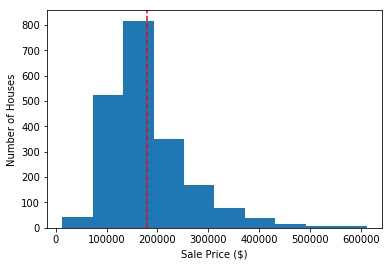

In [126]:
plt.xlabel('Sale Price ($)')
plt.ylabel('Number of Houses')
plt.hist(df_train.SalePrice)
df_train['SalePrice'].mean()
xposition = [180000]
for xc in xposition:
    plt.axvline(x=xc, color='red', linestyle='--')

# Creating a plot showing the average price of houses for each overall quality 

In [104]:
xlabel = '''     
         Very Poor
         Poor
         Fair
         Below Average
         Average
         Above Average
         Good
         Very Good
         Excellent
         Very Excellent
       '''

In [105]:
xlabel = [ e.strip() for e in xlabel.split('\n') if e.strip() != '']

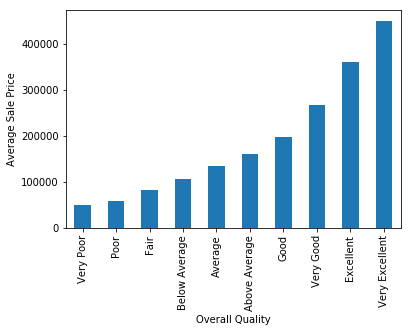

In [145]:
overall_qual_pivot = df_train.pivot_table(index='Overall Qual',values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', legend=None)
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.xticks(list(range(10)), xlabel);

# Creating a plot showing the average price of houses for each Neighborhood 


Text(0, 0.5, 'Average Sale Price ($)')

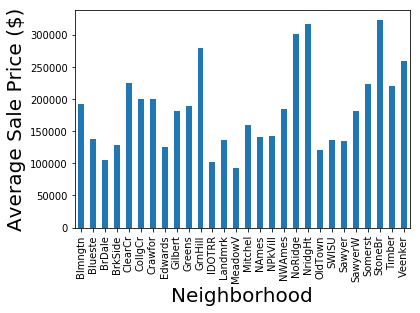

In [142]:
n_pivot = df_train.pivot_table(index='Neighborhood',values='SalePrice', aggfunc=np.median)
n_pivot.plot(kind='bar', legend=None)
plt.xlabel('Neighborhood',size=20,fontdict=None)
plt.ylabel('Average Sale Price ($)',size=20,fontdict=None)

# Creating a plot showing the average price of houses vs. year remodeled 


Text(0, 0.5, 'House Price ($)')

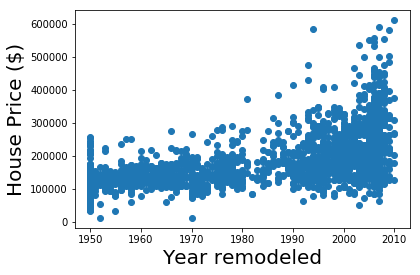

In [140]:
plt.scatter(df_train['Year Remod/Add'],y)
plt.xlabel('Year remodeled',size=20,fontdict=None)
plt.ylabel('House Price ($)',size=20,fontdict=None)

# Price Distribution by Neighborhood

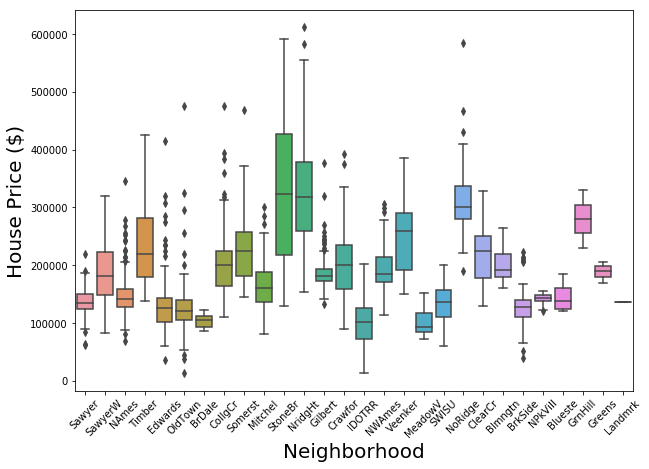

In [165]:
plt.rcParams['figure.figsize'] = (10, 7)

plot1 = sns.boxplot(data=df_train, x='Neighborhood', y='SalePrice')
plt.xlabel('Neighborhood',size=20,fontdict=None)
plt.ylabel('House Price ($)',size=20,fontdict=None)
#sns.ax.set_title("Price distribution by neighborhood")
plt.xticks(rotation=45)
plt.show()
